# Esercitazione 4

Elisa Stabilini - 942529

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
import seaborn as sns
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In questa simulazione si osserva la dinamica di un sistema di 108 particelle di Argon all'equilibrio termodinamico nelle tre fasi solida, liquida e gassosa.

La simulazione fa uso del codice di dinamica molecolare che calcola la nuova posizione delle molecole risolvendo le equazioni del moto. Il risolutore delle equazioni implementato fa uso dell'algoritmo di *Verlet*.

## Parte 1 - implementazione misura pressione

Il codice che include anche la misura della pressione è caricato al punto 2.

In [2]:
npart = 108

**Annotazioni**

Il programma di simulazione lavora in unità di Lennard-Jones, ovvero utilizzando $\sigma$ e $\epsilon$ come unità di lunghezza ed energia. 

Per riportare le grandezze in unità di misura del sistema internazionale devono essere smeplicemente risclate come segue:
* energia $E \rightarrow \epsilon E$
* lunghezza $l\rightarrow \sigma l*$
* denistà di massa $\rho \rightarrow m\sigma^{-3}\rho^*$
* temperatura $T\rightarrow\frac{\epsilon}{k_B}T^*$

dove i parametri con l'asterisco sono quelli forniti nel testo dell'esercizio per eseguire la simulazione (contenuti nei file di input).

Si riportano inoltre i valori delle seguenti grandezze:
* $m=39.948$ amu
* $\sigma = 0.34$ nm
* $\frac{\epsilon}{k_B} = 120 K$

## Parte 2 - termalizzazione e misure

Si noti che in ciascuna delle simulazioni di seguito il sistema è stato inizialmente preparato in una configurazione cristallina e che nella misurazione delle diverse grandezze è stata trascurata l'interazione tra molecole distanti (ad una distanza l'una dall'altra superiore al raggio di *cut-off*). Il valore di tale parametro è riportato nel seguito per ciascuna fase:
* fase solida: $r_c = 2.2$
* fase liquida: $r_c = 2.5$
* fase gassosa: $r_c = 5.0$

### Solido

#### Equilibrazione

Prima di poter effettuare sul sistema le misure delle grandezze richieste è necessario portare il sistema all'equilibrio. Nello specifico il sistema è stato lasciato evolvere per un tempo di 5000 passi per poter effettuare le misure alla temperatura richiesta di $T=0.8$.

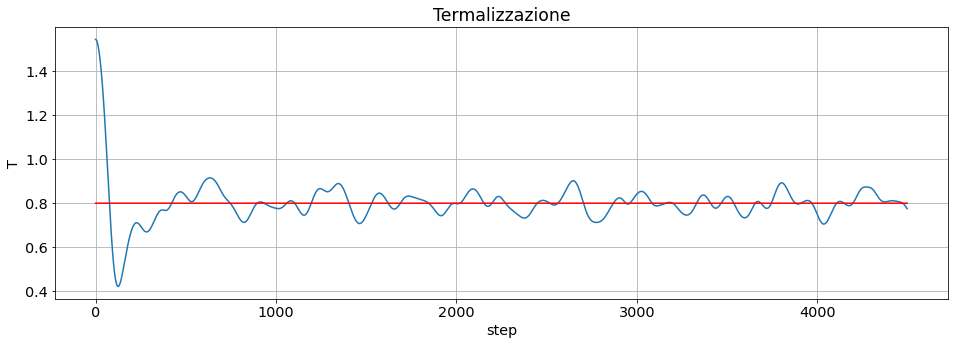

In [8]:
step, media = np.loadtxt("./Solid/PreprintTempS.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(16,5))
plt.plot(step, media, label="Termalizzazione")
plt.title("Termalizzazione")
plt.plot(step, 0.8*np.ones(step.size), color='red', label='True Temp')
plt.xlabel('step')
plt.ylabel('T')
plt.grid(True)
plt.show()

Per fare questa simulazione è stata utilizzata una temperatura di partenza $T=1.5435$

#### Simulazione

Per ricavare il valore delle granzze termodinamiche è stata fatta una simulazione di $M=50$ blocchi, ciascuno di 1000 step. La misurazione delle grandezze ha preso avvio dall'ultimo step del processo di equilibrazione.

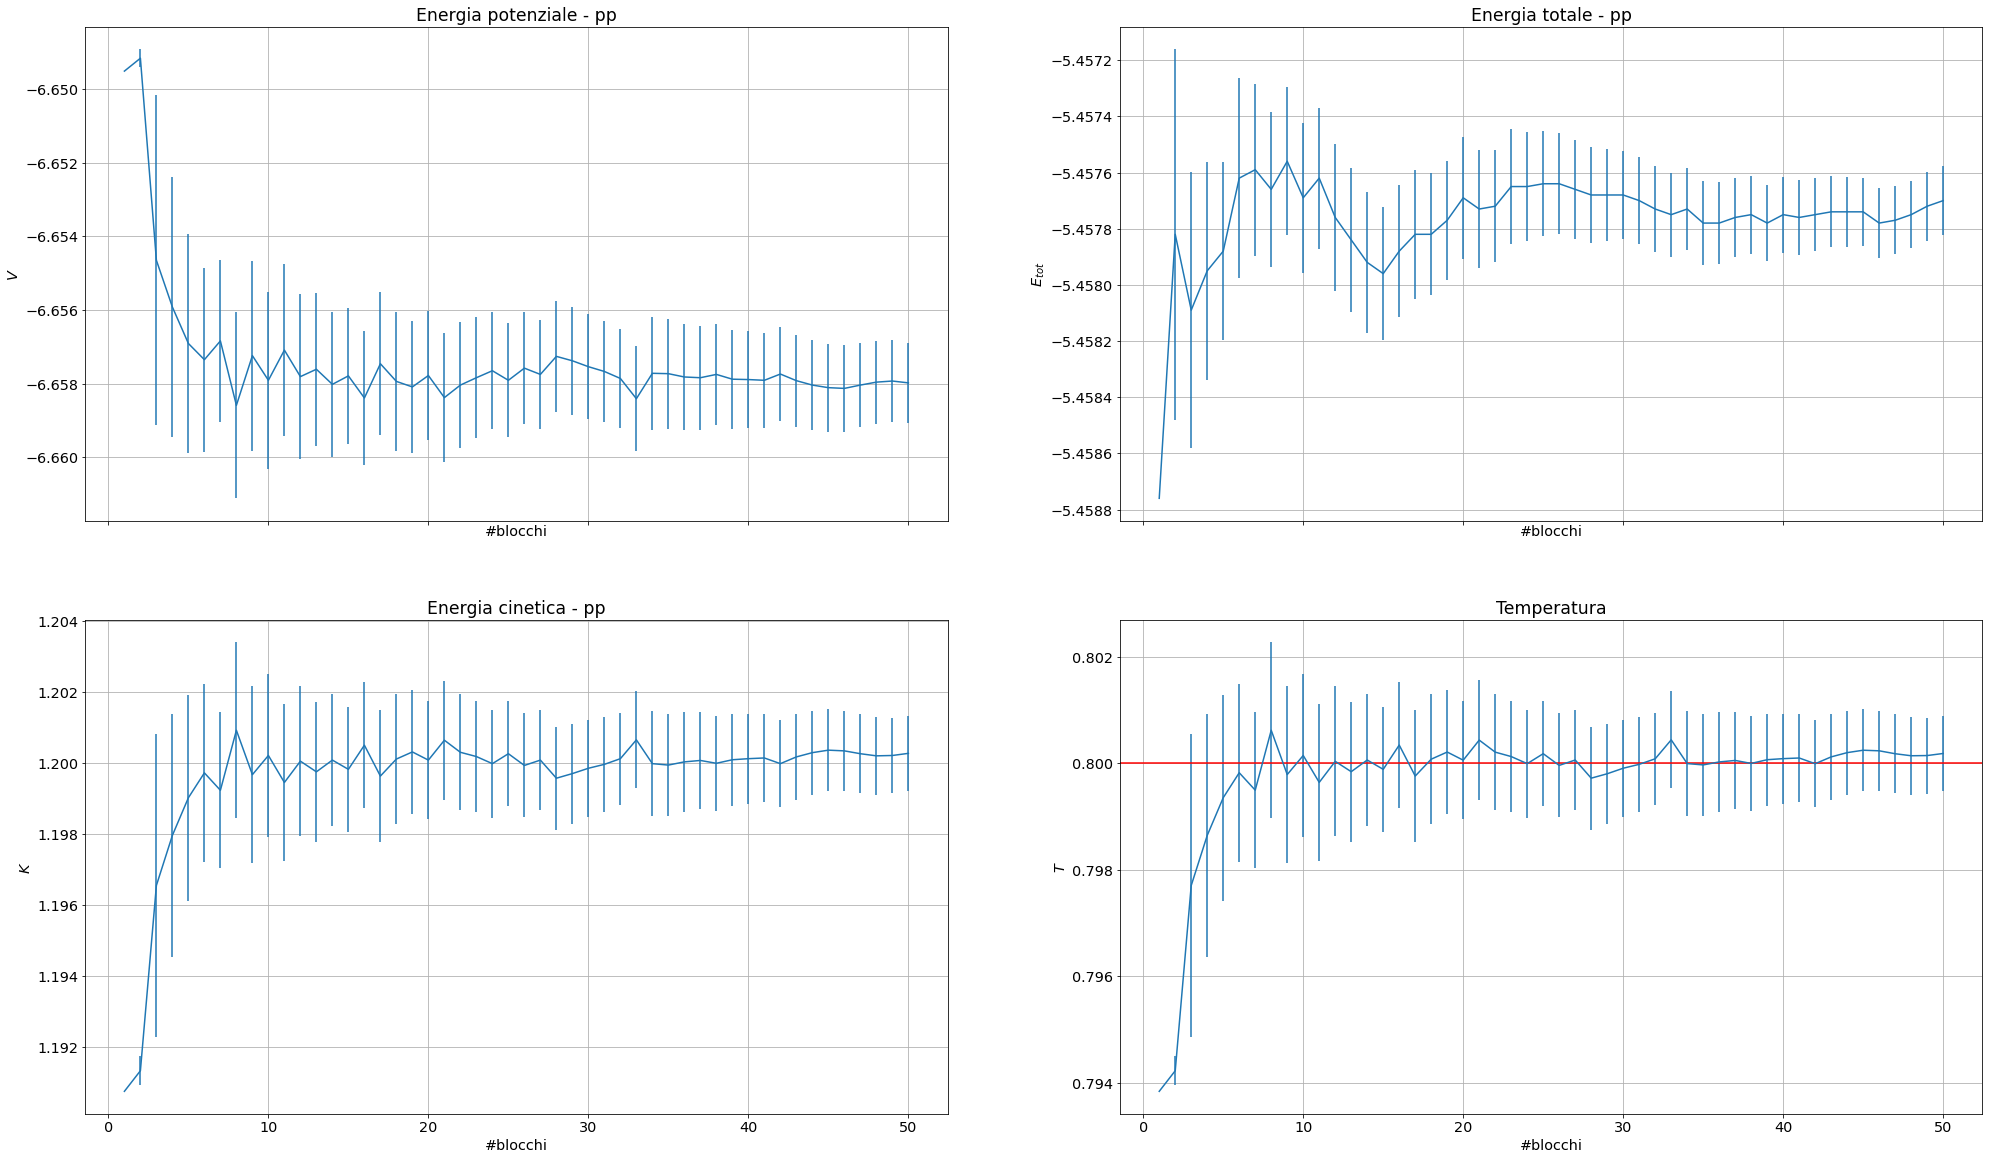

In [21]:
x, x1, err1 = np.loadtxt("./Solid/output_epot.dat", usecols=(0,2,3), unpack='true')
x, x2, err2 = np.loadtxt("./Solid/output_etot.dat", usecols=(0,2,3), unpack='true')
x, x3, err3 = np.loadtxt("./Solid/output_ekin.dat", usecols=(0,2,3), unpack='true')
x, x4, err4 = np.loadtxt("./Solid/output_temp.dat", usecols=(0,2,3), unpack='true')

fig, axs = plt.subplots(2, 2, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0,0].errorbar(x, x1, yerr=err1)
axs[0,1].errorbar(x, x2, yerr=err2)
axs[1,0].errorbar(x, x3, yerr=err3)
axs[1,1].errorbar(x, x4, yerr=err4)
axs[1,1].axhline(y=0.8, xmin=0, xmax=1, color='red', label='True Temp')

axs[0,0].set_title('Energia potenziale - pp')
axs[0,1].set_title('Energia totale - pp')
axs[1,0].set_title('Energia cinetica - pp')
axs[1,1].set_title('Temperatura')

axs[0,0].set_xlabel("#blocchi")
axs[0,1].set_xlabel("#blocchi")
axs[1,0].set_xlabel("#blocchi")
axs[1,1].set_xlabel("#blocchi")

axs[0,0].set_ylabel("$V$")
axs[0,1].set_ylabel("$E_{tot}$")
axs[1,0].set_ylabel("$K$")
axs[1,1].set_ylabel("$T$")

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
plt.show()

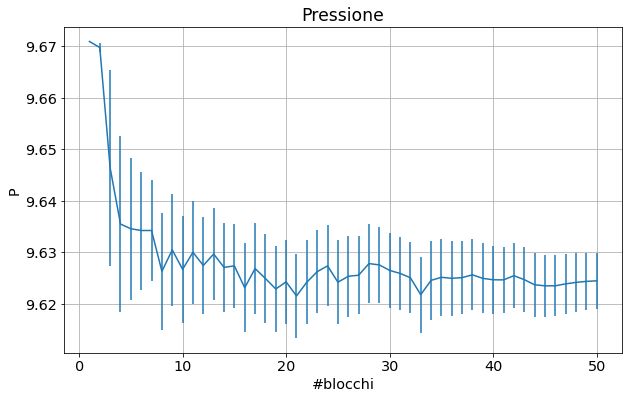

In [7]:
x, x5, err5 = np.loadtxt("./Solid/output_press.dat", usecols=(0,2,3), unpack='true')

plt.errorbar(x, x5, yerr=err5)
plt.ylabel('P')
plt.xlabel('#blocchi')
plt.title('Pressione')
plt.grid(True)
plt.show()

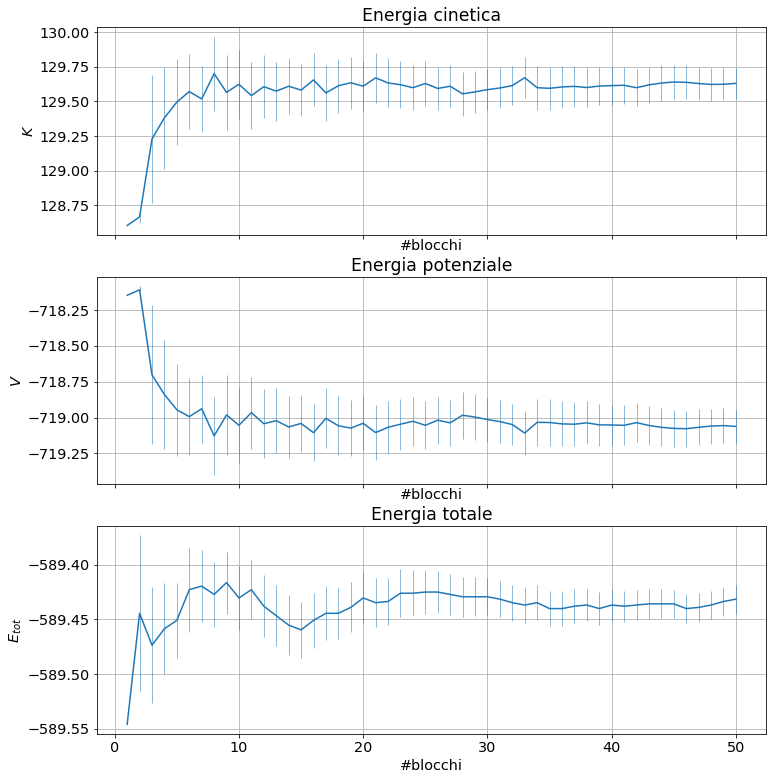

In [17]:
fig2, ((ekinN_plt), (epotN_plt), (etotN_plt)) = plt.subplots(3,1, sharex = True)
fig2.set_figheight(13)
fig2.set_figwidth(12)

epotN_plt.errorbar(x, x1*npart, err1*npart, elinewidth=0.5); 
epotN_plt.title.set_text("Energia potenziale")
epotN_plt.set_ylabel("$V$")
epotN_plt.set_xlabel("#blocchi");
epotN_plt.grid();

etotN_plt.errorbar(x, x2*npart, err2*npart, elinewidth=0.5); 
etotN_plt.title.set_text("Energia totale")
etotN_plt.set_ylabel("$E_{tot}$")
etotN_plt.set_xlabel("#blocchi");
etotN_plt.grid();

ekinN_plt.errorbar(x, x3*npart, err3*npart, elinewidth=0.5); 
ekinN_plt.title.set_text("Energia cinetica")
ekinN_plt.set_ylabel("$K$")
ekinN_plt.set_xlabel("#blocchi");
ekinN_plt.grid(); 

### Liquido

#### Equilibrazione

Anche in questo caso è stato necessario trovare una buona temperatura di partenza ($T=1.98$) per poter equilibrare il sistema e quindi effettuare le misure alla temperatura richiesta di $T=1.1$.

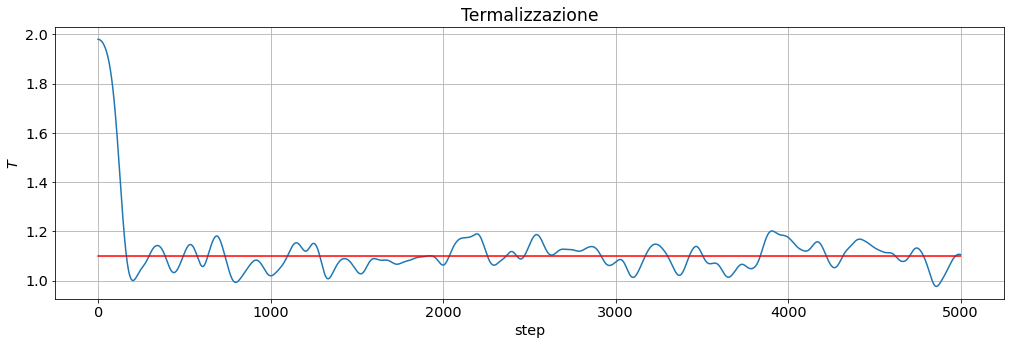

In [23]:
step, media = np.loadtxt("./Liquid/PreprintTempL.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(17,5))
plt.plot(step, media, label="Termalizzazione")
plt.title("Termalizzazione")
plt.plot(step, 1.1*np.ones(step.size), color='red', label='True Temp')
plt.xlabel('step')
plt.ylabel('$T$')
plt.grid(True)
plt.show()

#### Simulazione

Le misurazioni sono state fatte secondo la modalità descritta in precedenza, in questo caso sono stati utilizzati $M=60$ blocchi, ciascuno di 1000 step.

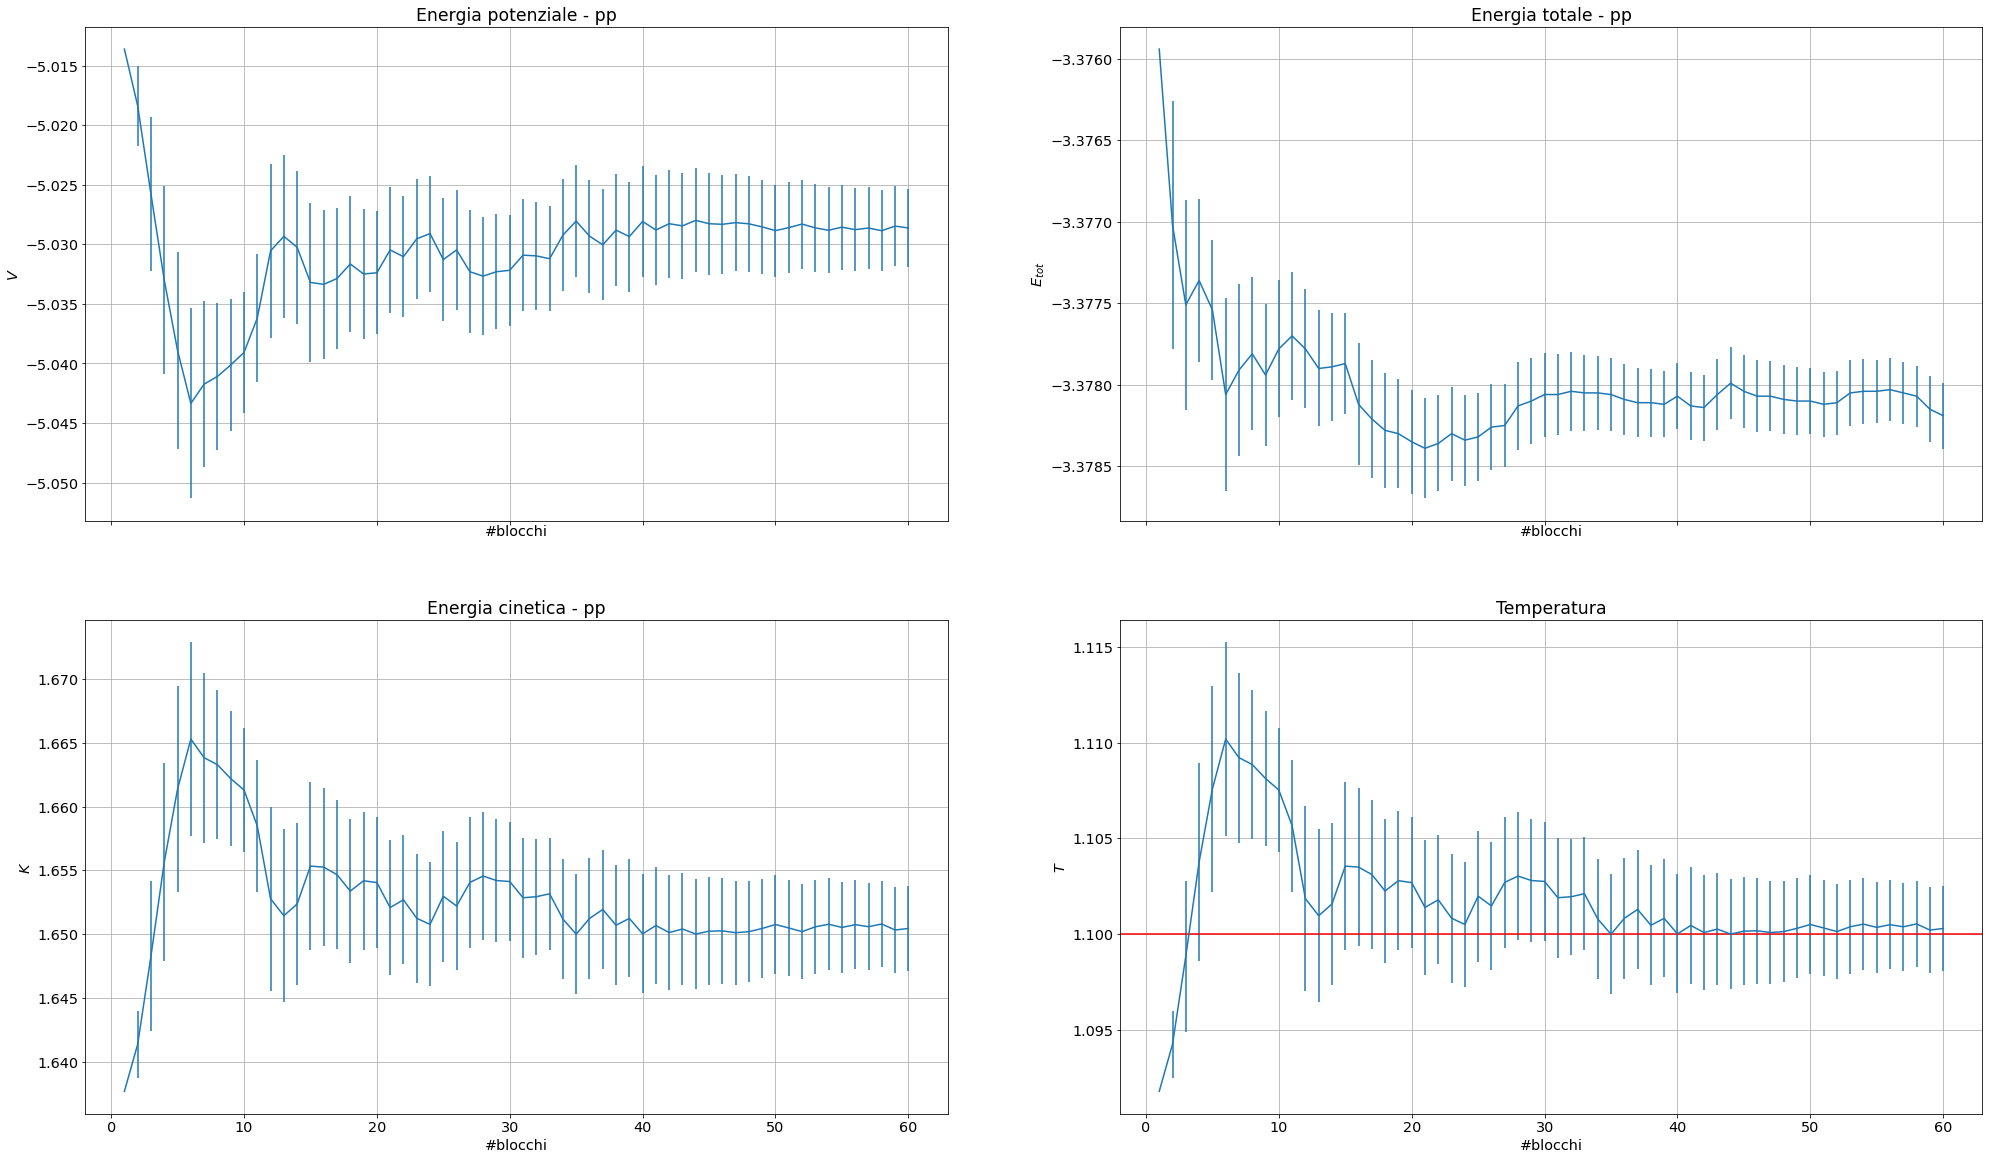

In [25]:
x, x1, err1 = np.loadtxt("./Liquid/output_epot.dat", usecols=(0,2,3), unpack='true')
x, x2, err2 = np.loadtxt("./Liquid/output_etot.dat", usecols=(0,2,3), unpack='true')
x, x3, err3 = np.loadtxt("./Liquid/output_ekin.dat", usecols=(0,2,3), unpack='true')
x, x4, err4 = np.loadtxt("./Liquid/output_temp.dat", usecols=(0,2,3), unpack='true')

fig, axs = plt.subplots(2, 2, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0,0].errorbar(x, x1, yerr=err1)
axs[0,1].errorbar(x, x2, yerr=err2)
axs[1,0].errorbar(x, x3, yerr=err3)
axs[1,1].errorbar(x, x4, yerr=err4)
axs[1,1].axhline(y=0.8, xmin=0, xmax=1, color='red', label='True Temp')

axs[0,0].set_title('Energia potenziale - pp')
axs[0,1].set_title('Energia totale - pp')
axs[1,0].set_title('Energia cinetica - pp')
axs[1,1].set_title('Temperatura')

axs[0,0].set_xlabel("#blocchi")
axs[0,1].set_xlabel("#blocchi")
axs[1,0].set_xlabel("#blocchi")
axs[1,1].set_xlabel("#blocchi")

axs[0,0].set_ylabel("$V$")
axs[0,1].set_ylabel("$E_{tot}$")
axs[1,0].set_ylabel("$K$")
axs[1,1].set_ylabel("$T$")

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
plt.show()

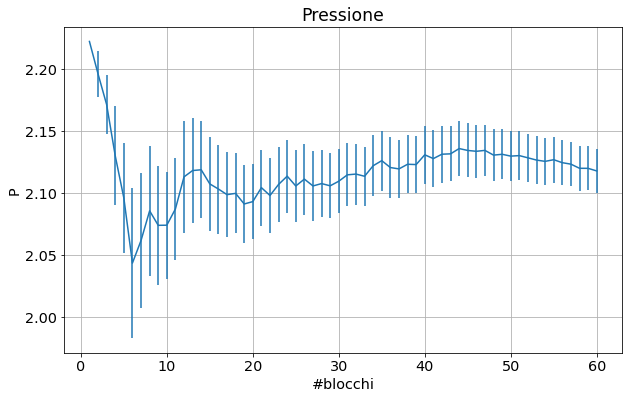

In [26]:
x, x5, err5 = np.loadtxt("./Liquid/output_press.dat", usecols=(0,2,3), unpack='true')

plt.errorbar(x, x5, yerr=err5)
plt.ylabel('P')
plt.xlabel('#blocchi')
plt.title('Pressione')
plt.grid(True)
plt.show()

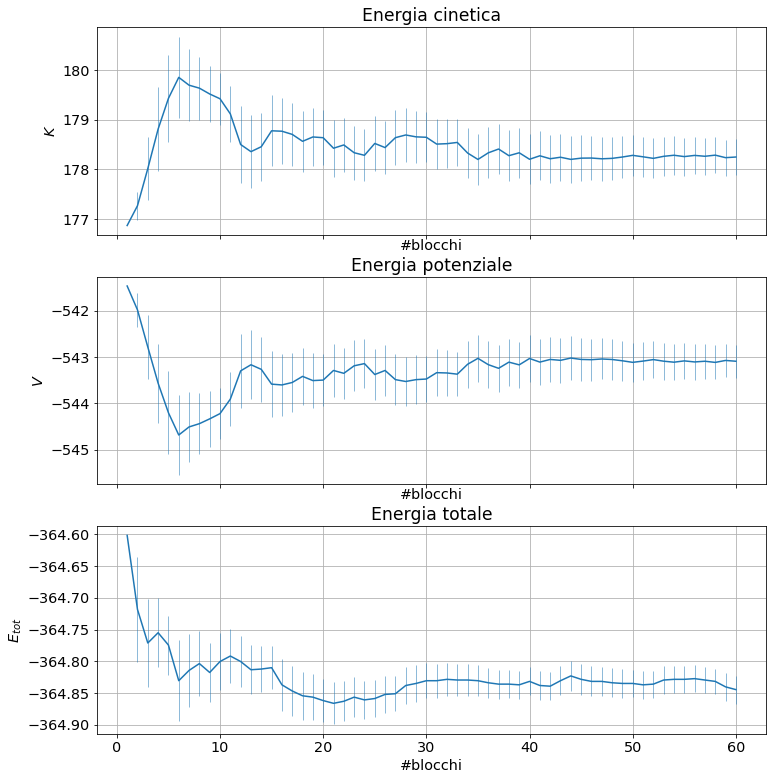

In [27]:
fig2, ((ekinN_plt), (epotN_plt), (etotN_plt)) = plt.subplots(3,1, sharex = True)
fig2.set_figheight(13)
fig2.set_figwidth(12)

epotN_plt.errorbar(x, x1*npart, err1*npart, elinewidth=0.5); 
epotN_plt.title.set_text("Energia potenziale")
epotN_plt.set_ylabel("$V$")
epotN_plt.set_xlabel("#blocchi");
epotN_plt.grid();

etotN_plt.errorbar(x, x2*npart, err2*npart, elinewidth=0.5); 
etotN_plt.title.set_text("Energia totale")
etotN_plt.set_ylabel("$E_{tot}$")
etotN_plt.set_xlabel("#blocchi");
etotN_plt.grid();

ekinN_plt.errorbar(x, x3*npart, err3*npart, elinewidth=0.5); 
ekinN_plt.title.set_text("Energia cinetica")
ekinN_plt.set_ylabel("$K$")
ekinN_plt.set_xlabel("#blocchi");
ekinN_plt.grid(); 

### Gas

#### Equilibrazione

L'equilibrazione del modello di Argon in fase gassosa ha richiesto parecchio tempo, come si può osservare anche dal numero di step necessari a raggiongere con una approssimazione accettabile la temperatura richeista $T=1.2$.

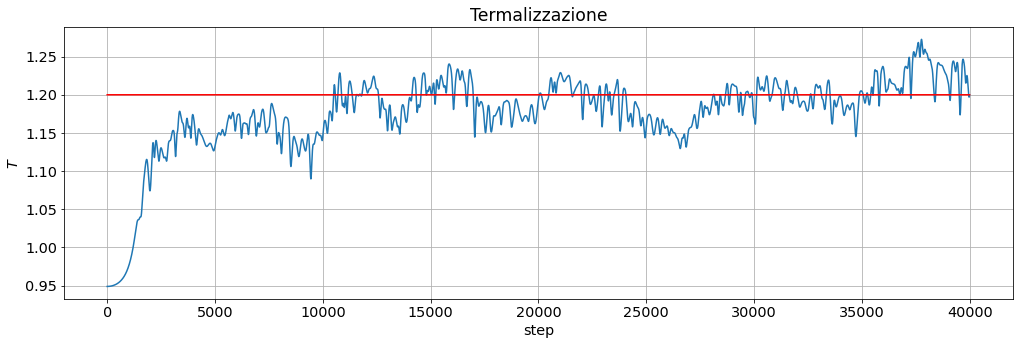

In [28]:
step, media = np.loadtxt("./Gas/PreprintTempG.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(17,5))
plt.plot(step, media, label="Termalizzazione")
plt.title("Termalizzazione")
plt.plot(step, 1.2*np.ones(step.size), color='red', label='True Temp')
plt.xlabel('step')
plt.ylabel('$T$')
plt.grid(True)
plt.show()

La temperatura di partenza è stata scelta a $T=0.947$. Data la difficolta nel rilevare l'effettiva conclusione dell'equilibrazione il numero si step preliminari è stato portato a $N=40000$.

#### Simulazione

Per ragioni analoghe a quelle che hanno portato ad aumentare il numero di step necessari a termalizzare il sistema, in fase di misurazione sono stati utilizzati $M=60$ step ciascuno di 3000 passi.

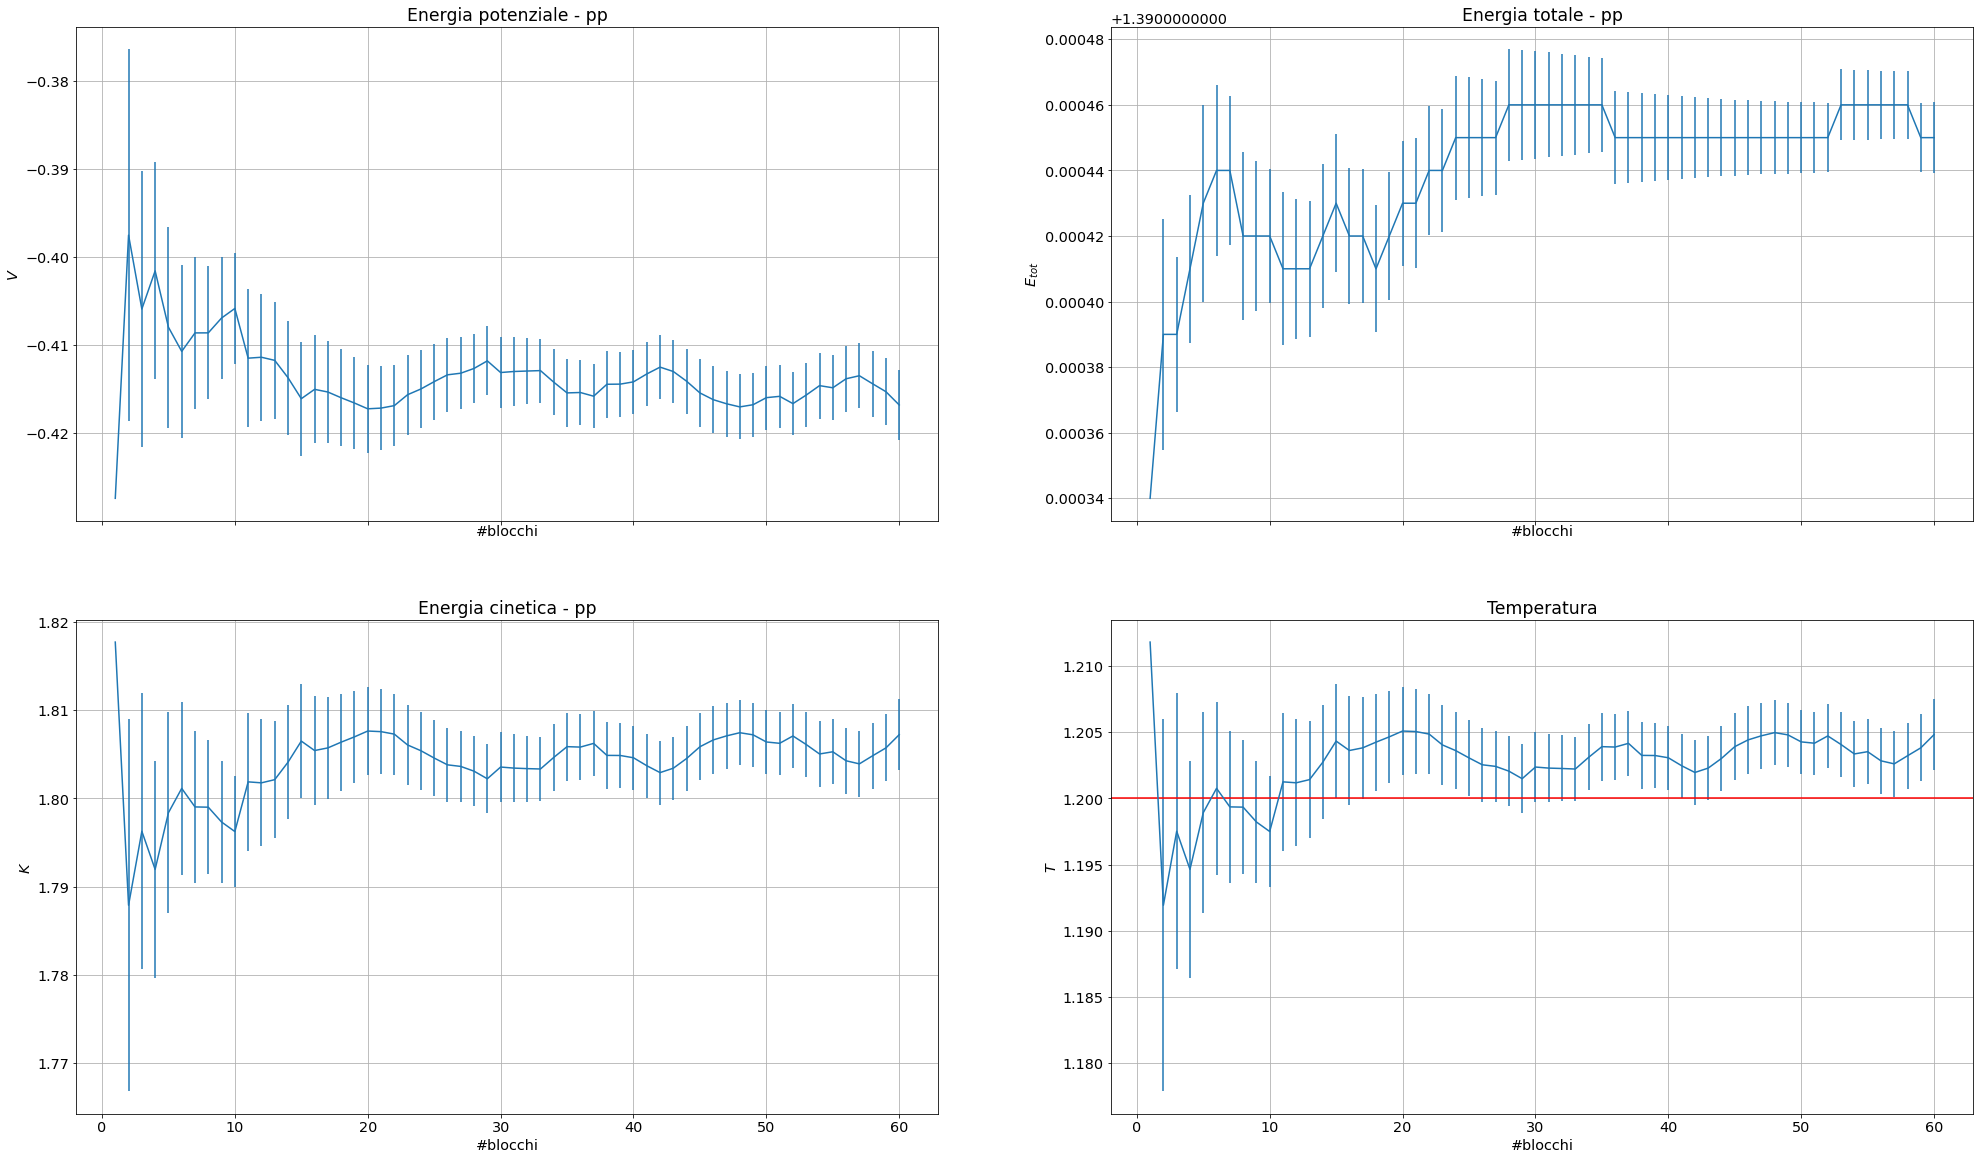

In [29]:
x, x1, err1 = np.loadtxt("./Gas/output_epot.dat", usecols=(0,2,3), unpack='true')
x, x2, err2 = np.loadtxt("./Gas/output_etot.dat", usecols=(0,2,3), unpack='true')
x, x3, err3 = np.loadtxt("./Gas/output_ekin.dat", usecols=(0,2,3), unpack='true')
x, x4, err4 = np.loadtxt("./Gas/output_temp.dat", usecols=(0,2,3), unpack='true')

fig, axs = plt.subplots(2, 2, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0,0].errorbar(x, x1, yerr=err1)
axs[0,1].errorbar(x, x2, yerr=err2)
axs[1,0].errorbar(x, x3, yerr=err3)
axs[1,1].errorbar(x, x4, yerr=err4)
axs[1,1].axhline(y=1.2, xmin=0, xmax=1, color='red', label='True Temp')

axs[0,0].set_title('Energia potenziale - pp')
axs[0,1].set_title('Energia totale - pp')
axs[1,0].set_title('Energia cinetica - pp')
axs[1,1].set_title('Temperatura')

axs[0,0].set_xlabel("#blocchi")
axs[0,1].set_xlabel("#blocchi")
axs[1,0].set_xlabel("#blocchi")
axs[1,1].set_xlabel("#blocchi")

axs[0,0].set_ylabel("$V$")
axs[0,1].set_ylabel("$E_{tot}$")
axs[1,0].set_ylabel("$K$")
axs[1,1].set_ylabel("$T$")

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
plt.show()

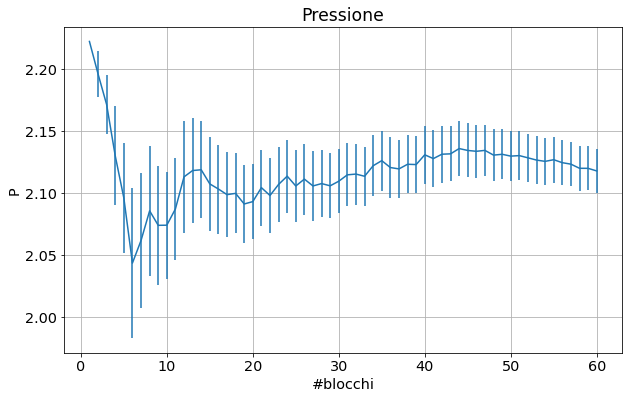

In [30]:
x, x5, err5 = np.loadtxt("./Gas/output_press.dat", usecols=(0,2,3), unpack='true')

x, x5, err5 = np.loadtxt("./Liquid/output_press.dat", usecols=(0,2,3), unpack='true')

plt.errorbar(x, x5, yerr=err5)
plt.ylabel('P')
plt.xlabel('#blocchi')
plt.title('Pressione')
plt.grid(True)
plt.show()

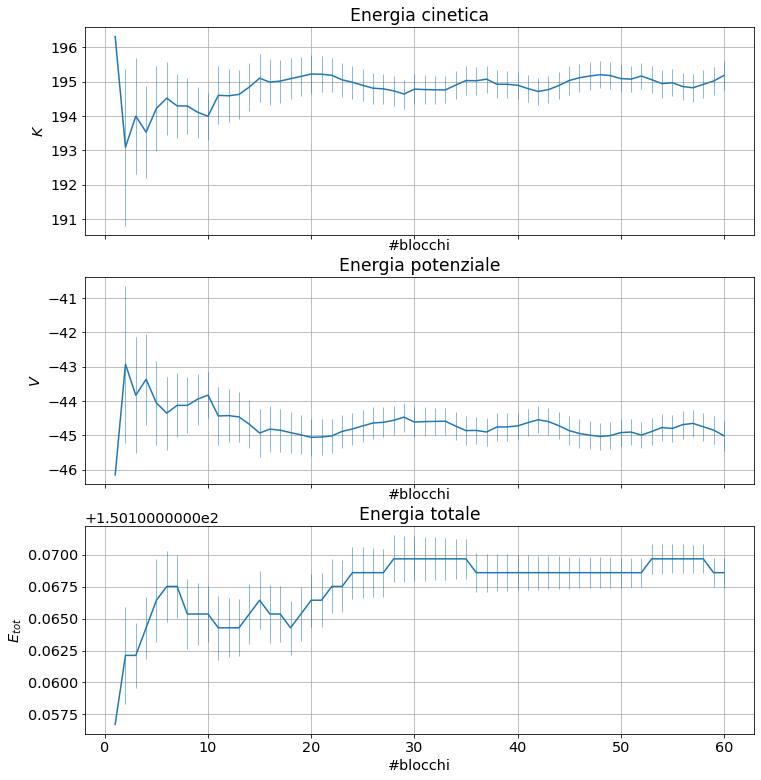

In [31]:
fig2, ((ekinN_plt), (epotN_plt), (etotN_plt)) = plt.subplots(3,1, sharex = True)
fig2.set_figheight(13)
fig2.set_figwidth(12)

epotN_plt.errorbar(x, x1*npart, err1*npart, elinewidth=0.5); 
epotN_plt.title.set_text("Energia potenziale")
epotN_plt.set_ylabel("$V$")
epotN_plt.set_xlabel("#blocchi");
epotN_plt.grid();

etotN_plt.errorbar(x, x2*npart, err2*npart, elinewidth=0.5); 
etotN_plt.title.set_text("Energia totale")
etotN_plt.set_ylabel("$E_{tot}$")
etotN_plt.set_xlabel("#blocchi");
etotN_plt.grid();

ekinN_plt.errorbar(x, x3*npart, err3*npart, elinewidth=0.5); 
ekinN_plt.title.set_text("Energia cinetica")
ekinN_plt.set_ylabel("$K$")
ekinN_plt.set_xlabel("#blocchi");
ekinN_plt.grid(); 